<h1>WGU D212 TASK 2 REV 5 - MATTINSON</h1>

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

W:\code\wgu\py39\scripts\python.exe
python version: 3.9.7
pandas version: 1.4.1
numpy version: 1.22.1
scipy version: 1.7.3
sklearn version: 1.0.2
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [3]:
from helpers import *

get_course_filename_str version: 1.5
save_course_table_csv version: 1.4
describe_dataframe_type version: 1.1
create_scatter_plot_fig version: 1.1
create_barplot_num_vs_cat_fig version: 1.9
create_distribution_plot_from_feature_fig version: 1.9
get_unique_values_list version: 1.2
create_correlation_matrix version: 1.2
get_redundant_pairs version: 1.0
get_top_n_correlations version: 1.0
create_simple_histogram_numerical_feature_fig version: 1.10
create_stacked_barplot_cat_or_bool_feature_fig version: 1.7
create_stacked_histogram_num_feature_fig version: 1.6


## Explore Data

1.	R <= import .csv file
2.	S <= Drop unwanted data from R
3.	Describe S’s numerical data
4.	Describe S’s categorical data


In [4]:
# R <= import .csv file
R = pd.read_csv('data/churn_clean.csv')

In [5]:
# S <= drop unwanted data from R
S = R.drop(columns=[
    'CaseOrder','UID', 'County', 
    'Interaction', 'City', 'Job',
    'Zip','Population', 'Lat', 'Lng',
    'Customer_id','State','TimeZone'])

In [6]:
# describe numerical data - highlight small std
df = S.describe().round(3).T
def highlight_cells(val, color_if_true):
    color = color_if_true if val <= 3  else ''
    return 'background-color: {}'.format(color)
df[['mean','std','min','max']].style.applymap(highlight_cells, 
    color_if_true='yellow', subset=['std'])

,mean,std,min,max
Children,2.088000,2.147000,0.000000,10.000000
Age,53.078000,20.699000,18.000000,89.000000
Income,39806.927000,28199.917000,348.670000,258900.700000
Outage_sec_perweek,10.002000,2.976000,0.100000,21.207000
Email,12.016000,3.026000,1.000000,23.000000
Contacts,0.994000,0.988000,0.000000,7.000000
Yearly_equip_failure,0.398000,0.636000,0.000000,6.000000
Tenure,34.526000,26.443000,1.000000,71.999000
MonthlyCharge,172.625000,42.943000,79.979000,290.160000
Bandwidth_GB_Year,3392.342000,2185.295000,155.507000,7158.982000


In [ ]:
# pair plot
sns.pairplot(S, hue='Churn', diag_kind='hist')

## Train Test RFE

In [ ]:
numeric_features_list = S.select_dtypes(exclude="object").columns.tolist()
categorical_features_list = S.select_dtypes(include="object").columns.tolist()
numeric_and_target_features_list = numeric_features_list.append('Churn')
reduced_df = S[numeric_features_list]
print(reduced_df.columns)
print(reduced_df.shape)

In [ ]:
from sklearn.model_selection import train_test_split
y = reduced_df['Churn']
X = reduced_df.drop('Churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], 
        X_train.shape[0], X_test.shape[1]))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)
rfe.fit(X_train_std, y_train)

In [ ]:
X.columns[rfe.support_]

In [ ]:
dict(zip(X.columns, rfe.ranking_))

In [ ]:
accuracy_score(y_test, rfe.predict(X_test_std))

## PCA Pseudo Code

5.	target <= ‘Churn’
6.	Y <= S.loc[:, S.columns == target]
7.	X <= S.loc[:, S.columns != target]
8.	D <= create dummy variables from X
9.	Z <= standardize D
10.	A<= feature selection
11.	Create covariance matrix
12.	Calculate Eigenvalues
13.	Sort Eigenvalues


In [7]:
# target <= 'Churn'
target = 'Churn'

In [8]:
# Y <= S.loc[:, S.columns == target]
Y = S.loc[:, S.columns == target]
print(Y.columns)
print(Y.shape)

Index(['Churn'], dtype='object')
(10000, 1)


In [9]:
# X <= S.loc[:, S.columns != target]
X = S.loc[:, S.columns != target]
print(X.columns)
print(X.shape)
#print(describe_dataframe_type(X))

Index(['Area', 'Children', 'Age', 'Income', 'Marital', 'Gender',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')
(10000, 36)


In [10]:
# D <= create dummy variables from X
categorical_features = X.select_dtypes(include="object").columns
D = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print(D.columns)
print(D.shape)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')
(10000, 45)


In [11]:
# Z <= standardize D
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(D)
Z = pd.DataFrame(Z_scaled, columns=D.columns)
print(Z.shape)

(10000, 45)


In [12]:
# A <= remove highly correlated features, adapted (2022_Boeye_ART)
threshhold = 0.90
corr_df = Z.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshhold)]
A = Z.drop(columns = to_drop, axis=1)
print(to_drop)
print(A.columns)
print(A.shape)

['Tenure']
Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1',
       'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')
(10000, 44)


In [13]:
# create covariance matrix
A.cov().round(2)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Item1,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
Children,1.00,-0.03,0.01,0.00,0.00,-0.02,0.01,-0.01,0.03,0.01,...,0.01,-0.00,0.01,0.00,-0.01,0.00,0.01,0.01,0.00,-0.00
Age,-0.03,1.00,-0.00,-0.01,0.00,0.02,0.01,0.01,-0.01,-0.01,...,-0.01,0.00,0.01,0.02,-0.00,0.01,0.00,-0.00,0.00,-0.02
Income,0.01,-0.00,1.00,-0.01,-0.01,0.00,0.01,-0.00,0.00,-0.00,...,-0.01,-0.01,0.01,0.01,-0.00,-0.00,-0.01,-0.01,0.00,0.01
Outage_sec_perweek,0.00,-0.01,-0.01,1.00,0.00,0.02,0.00,0.02,0.00,-0.02,...,-0.00,0.00,0.02,-0.01,0.01,0.02,-0.01,0.01,0.00,-0.01
Email,0.00,0.00,-0.01,0.00,1.00,0.00,-0.02,0.00,-0.01,0.00,...,-0.02,-0.01,0.00,0.02,0.01,0.00,-0.01,0.02,-0.01,0.00
Contacts,-0.02,0.02,0.00,0.02,0.00,1.00,-0.01,0.00,0.00,-0.01,...,0.01,0.01,0.00,-0.01,0.00,0.01,-0.00,0.00,-0.00,-0.02
Yearly_equip_failure,0.01,0.01,0.01,0.00,-0.02,-0.01,1.00,-0.01,0.01,0.01,...,-0.02,-0.01,-0.01,0.00,0.00,-0.00,0.02,0.01,0.02,-0.02
MonthlyCharge,-0.01,0.01,-0.00,0.02,0.00,0.00,-0.01,1.00,0.06,0.01,...,0.05,0.26,0.16,0.12,0.48,0.61,0.00,0.01,-0.01,-0.00
Bandwidth_GB_Year,0.03,-0.01,0.00,0.00,-0.01,0.00,0.01,0.06,1.00,-0.01,...,0.02,0.04,-0.01,0.00,0.05,0.05,-0.00,0.01,-0.00,0.01
Item1,0.01,-0.01,-0.00,-0.02,0.00,-0.01,0.01,0.01,-0.01,1.00,...,0.00,-0.01,0.00,0.03,0.00,-0.01,0.01,-0.00,0.01,-0.02


<AxesSubplot:>

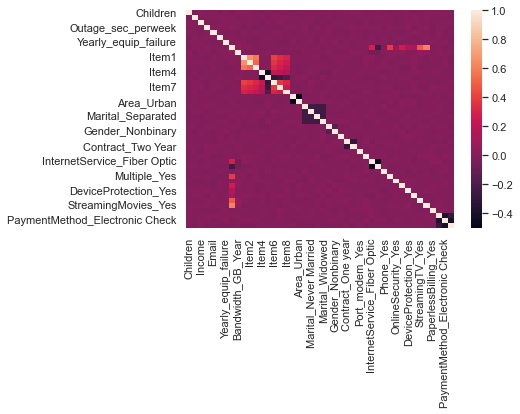

In [14]:
# create covariance matrix and plot
covMatrix = pd.DataFrame.cov(A)
sns.heatmap(covMatrix, annot=False, fmt='g')

In [15]:
pca = PCA()

In [16]:
pca.fit(A)

PCA()

In [17]:
pca.explained_variance_ratio_.round(3)

array([0.067, 0.047, 0.037, 0.034, 0.032, 0.032, 0.03 , 0.029, 0.029,
       0.028, 0.028, 0.026, 0.025, 0.024, 0.024, 0.024, 0.024, 0.023,
       0.023, 0.023, 0.023, 0.023, 0.022, 0.022, 0.022, 0.022, 0.022,
       0.022, 0.021, 0.021, 0.021, 0.019, 0.018, 0.016, 0.016, 0.013,
       0.012, 0.012, 0.011, 0.011, 0.007, 0.007, 0.006, 0.   ])

In [18]:
pca.explained_variance_ratio_.cumsum().round(3)

array([0.067, 0.114, 0.152, 0.186, 0.218, 0.25 , 0.28 , 0.309, 0.338,
       0.366, 0.394, 0.421, 0.445, 0.469, 0.493, 0.517, 0.54 , 0.564,
       0.587, 0.61 , 0.633, 0.656, 0.678, 0.7  , 0.722, 0.744, 0.766,
       0.788, 0.809, 0.831, 0.851, 0.871, 0.888, 0.904, 0.92 , 0.933,
       0.945, 0.957, 0.969, 0.979, 0.987, 0.994, 1.   , 1.   ])

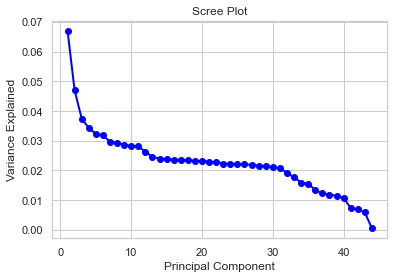

In [22]:
# create scree plot, adapted code from: 
# https://www.statology.org/scree-plot-python/
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 
      'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()